In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as sch



In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
x= df.iloc[:,3:5].values

In [ ]:
wcss=[]

In [ ]:
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++',max_iter=300,random_state=42) 
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)


In [ ]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 21850.165282585636,
 19672.072849014323]

Text(0, 0.5, 'WCSS')

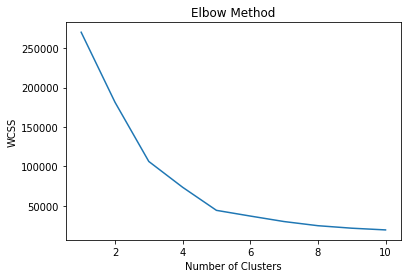

In [ ]:
plt.plot(range(1,11),wcss) 
plt.title("Elbow Method") 
plt.xlabel('Number of Clusters') 
plt.ylabel('WCSS')

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,random_state=42) 

y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

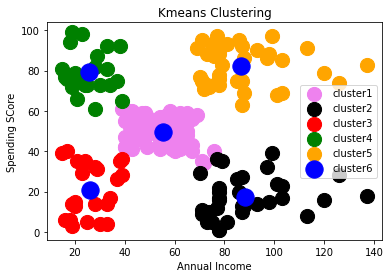

In [ ]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=200,c='violet',label='cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=200,c='black',label='cluster2') 
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=200,c='red',label='cluster3') 
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=200,c='green',label='cluster4') 
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=200,c='orange',label='cluster5') 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='blue',label='cluster6')

plt.title("Kmeans Clustering")
plt.xlabel('Annual Income') 
plt.ylabel('Spending SCore') 
plt.legend()
plt.show()

In [ ]:
range_n_clusters=[2,3,4,5,6]

for n_clusters in range_n_clusters:
  clusterer= KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels=clusterer.fit_predict(x)

  silhouette_avg= silhouette_score(x,cluster_labels)
  print("For n_clusters = " , n_clusters, "The average silhouette is: ", silhouette_avg)

For n_clusters =  2 The average silhouette is:  0.2968969162503008
For n_clusters =  3 The average silhouette is:  0.46761358158775435
For n_clusters =  4 The average silhouette is:  0.4931963109249047
For n_clusters =  5 The average silhouette is:  0.553931997444648
For n_clusters =  6 The average silhouette is:  0.5376203956398481


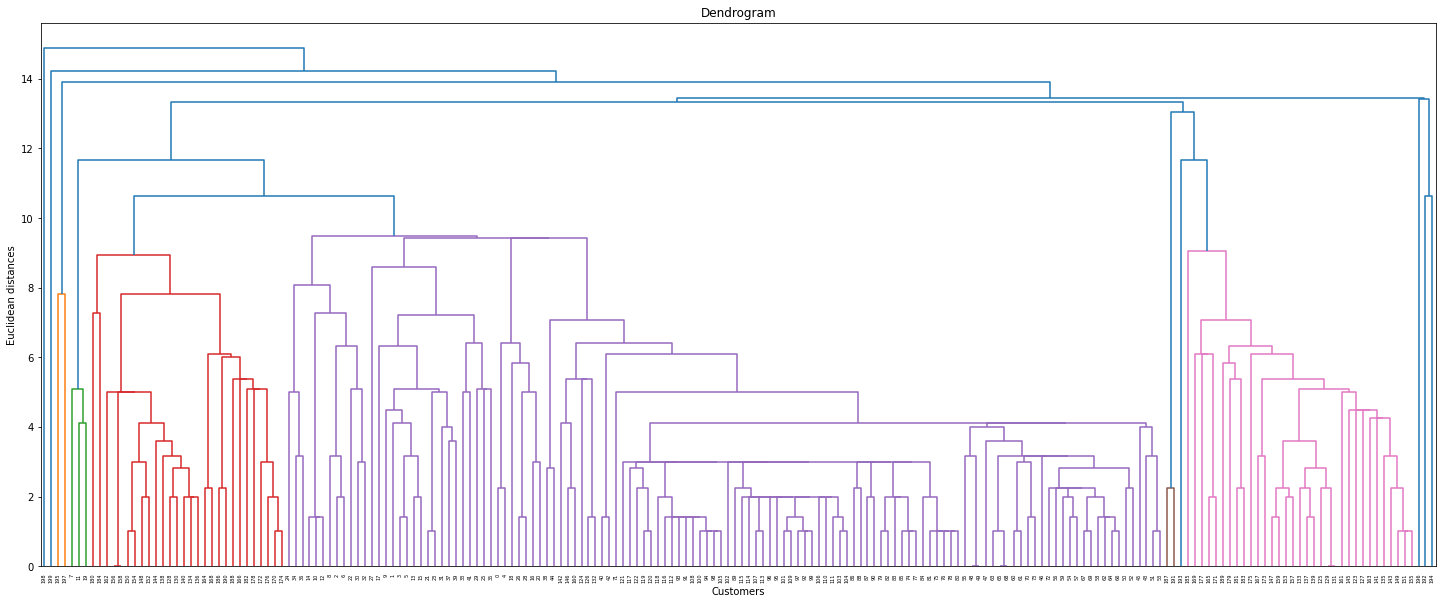

In [ ]:
plt.figure(figsize=(25,10))
dendrogram=sch.dendrogram(sch.linkage(x, method='single'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [ ]:
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage="complete")
y_hc=hc.fit_predict(x)

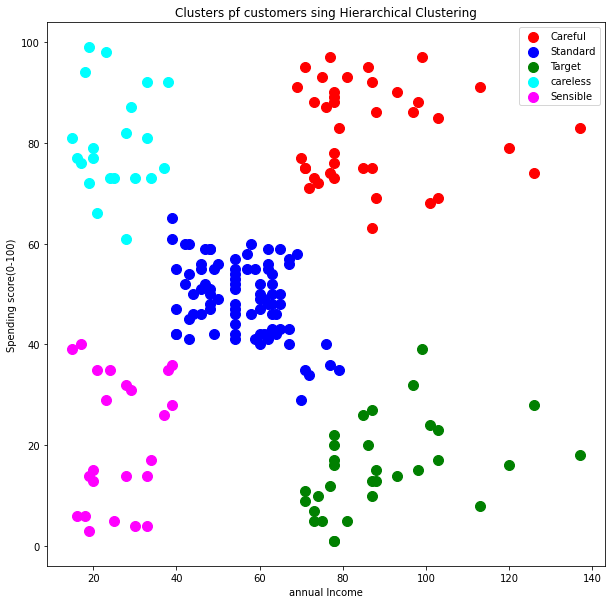

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x[y_hc==0,0],x[y_hc==0,1], s=100,c='red',label='Careful')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s =100, c='b',label='Standard')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='green',label='Target')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100, c="cyan", label="careless")
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=100,c="magenta", label='Sensible')
plt.title("Clusters pf customers sing Hierarchical Clustering")
plt.xlabel("annual Income")
plt.ylabel('Spending score(0-100)')
plt.legend()
plt.show()

In [ ]:
p